In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [3]:
dataset_test = pd.read_csv("titanic_test.csv")
dataset_train = pd.read_csv("titanic_train.csv")

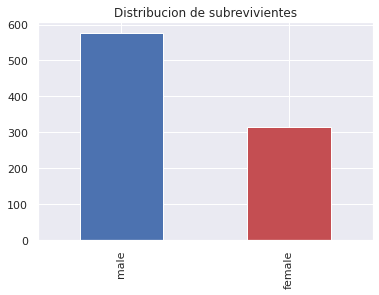

In [6]:
dataset_train.Sex.value_counts().plot(kind = "bar", color = ["b", "r"])
plt.title("Distribucion de subrevivientes")
plt.show()

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(dataset_train["Sex"])
dataset_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dataset_train["Age"] = dataset_train["Age"].fillna(dataset_train["Age"].median())
dataset_train["Embarked"] = dataset_train["Embarked"].fillna("S")

In [6]:
train_predictors = dataset_train.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1)

categorical_cols = [cname for cname in train_predictors.columns if 
                    train_predictors[cname].nunique() < 10 and
                    train_predictors[cname].dtype == "object"]

In [7]:
numerical_cols = [cname for cname in train_predictors.columns if 
                  train_predictors[cname].dtype in ["int64", "float64"]]

In [8]:
my_cols = categorical_cols + numerical_cols 

train_predictors = train_predictors[my_cols]

In [9]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [10]:
dataset_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
y_target = dataset_train["Survived"].values 
x_features_one = dummy_encoded_train_predictors.values

In [12]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = 0.25, random_state = 1)

In [13]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

In [15]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print("Accuracy: %0.4f" %(tree_one_accuracy))

Accuracy: 0.9798


In [16]:
#Genera una imagen con las rutas que el arbol de decision tomo
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("titanic.png")

True